In [2]:
# ==========================================
# Melanoma Dataset - Visual EDA
# ==========================================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from PIL import Image
from sklearn.manifold import TSNE
from torchvision import models, transforms
import torch


In [3]:

# ===========================
# 1️⃣ Paths and Setup
# ===========================
base_path = "/kaggle/input/melanoma-resized-dataset-version-03/melanoma_resized_dataset version 03"
classes = ['melanoma_in_situ', 'melanoma_invasive', 'nevus']

# Image transformation for feature extraction
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


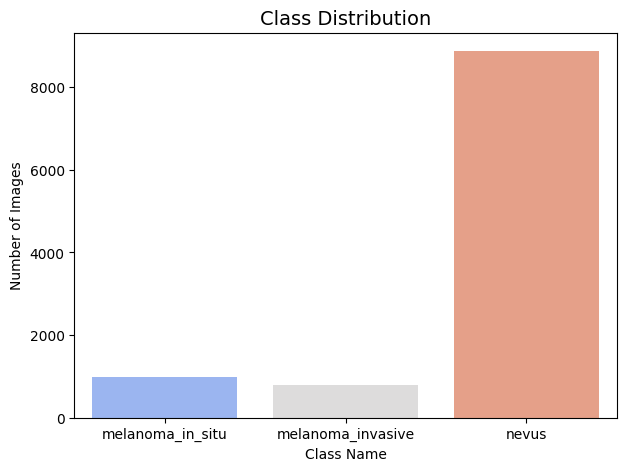

Class Counts: {'melanoma_in_situ': 983, 'melanoma_invasive': 797, 'nevus': 8876}


In [4]:

# ===========================
# 2️⃣ Class Distribution
# ===========================
class_counts = {cls: len(os.listdir(os.path.join(base_path, cls))) for cls in classes}
plt.figure(figsize=(7,5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="coolwarm")
plt.title("Class Distribution", fontsize=14)
plt.ylabel("Number of Images")
plt.xlabel("Class Name")
plt.show()

print("Class Counts:", class_counts)

Processing nevus: 100%|██████████| 8876/8876 [00:33<00:00, 263.82it/s]


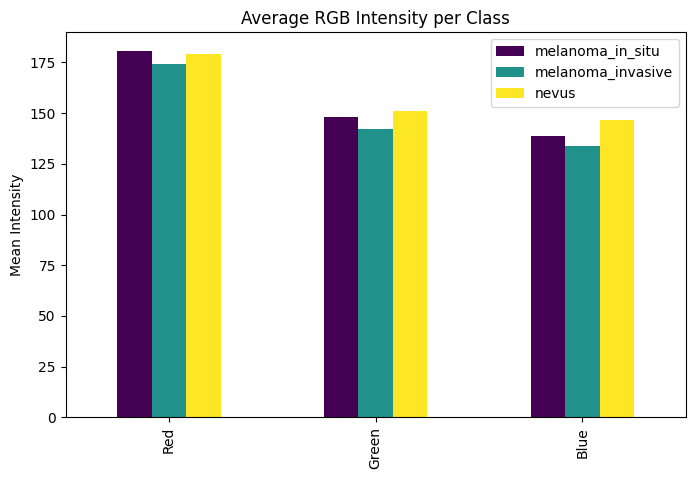

In [5]:

# ===========================
# 3️⃣ Mean RGB Intensity per Class
# ===========================
mean_colors = {}
for cls in classes:
    folder = os.path.join(base_path, cls)
    reds, greens, blues = [], [], []
    for file in tqdm(os.listdir(folder), desc=f"Processing {cls}"):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = Image.open(os.path.join(folder, file)).convert("RGB")
            img_np = np.array(img)
            reds.append(img_np[:,:,0].mean())
            greens.append(img_np[:,:,1].mean())
            blues.append(img_np[:,:,2].mean())
    mean_colors[cls] = [np.mean(reds), np.mean(greens), np.mean(blues)]

df_colors = pd.DataFrame(mean_colors, index=["Red", "Green", "Blue"])
df_colors.plot(kind="bar", figsize=(8,5), colormap="viridis")
plt.title("Average RGB Intensity per Class")
plt.ylabel("Mean Intensity")
plt.show()


Extracting features for t-SNE (this may take a few minutes)...


Embedding nevus (200 sample limit): 100%|██████████| 500/500 [00:15<00:00, 31.91it/s]


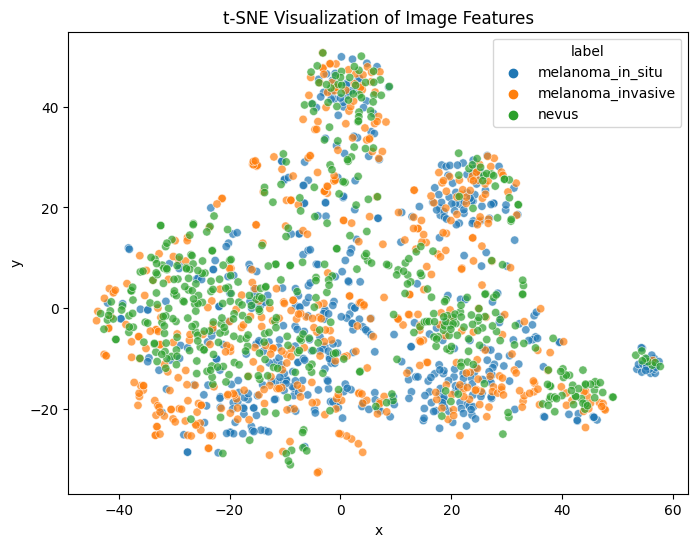

In [7]:

# ===========================
# 4️⃣ t-SNE Visualization of Image Features
# ===========================
print("\nExtracting features for t-SNE (this may take a few minutes)...")

# Load pretrained ResNet18 (for embeddings)
model = models.resnet18(weights='IMAGENET1K_V1')
model = torch.nn.Sequential(*list(model.children())[:-1])
model.eval()

features = []
labels = []

for cls in classes:
    folder = os.path.join(base_path, cls)
    for file in tqdm(os.listdir(folder)[:500], desc=f"Embedding {cls} (500 sample limit)"):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = Image.open(os.path.join(folder, file)).convert("RGB")
            img_t = transform(img).unsqueeze(0)
            with torch.no_grad():
                feat = model(img_t).flatten().numpy()
            features.append(feat)
            labels.append(cls)

features = np.array(features)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_features = tsne.fit_transform(features)

tsne_df = pd.DataFrame(tsne_features, columns=['x','y'])
tsne_df['label'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='x', y='y', hue='label', palette='tab10', alpha=0.7)
plt.title("t-SNE Visualization of Image Features")
plt.show()

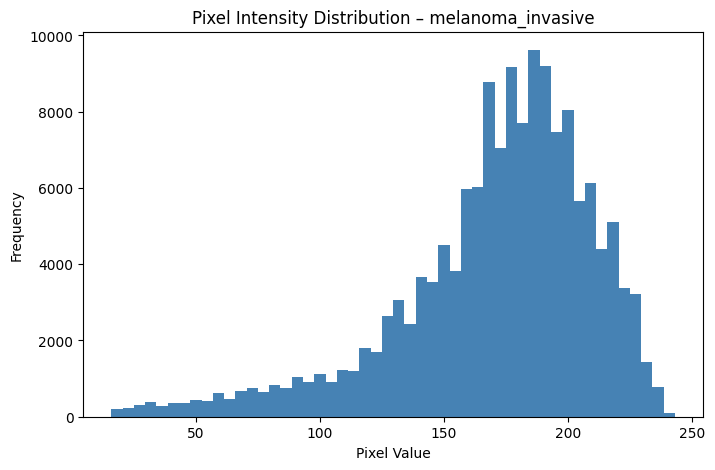

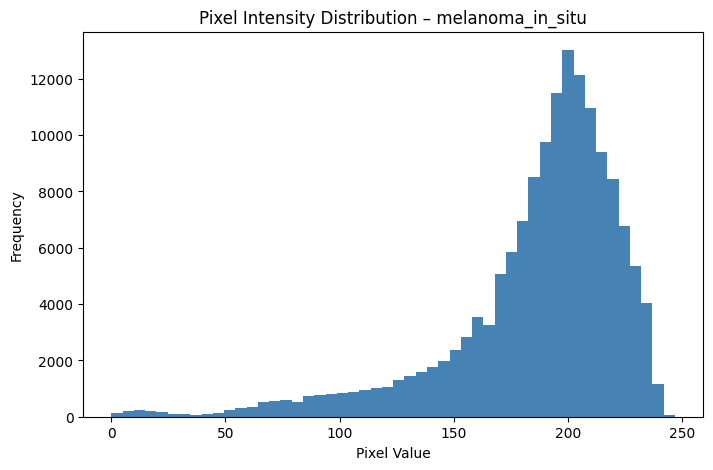

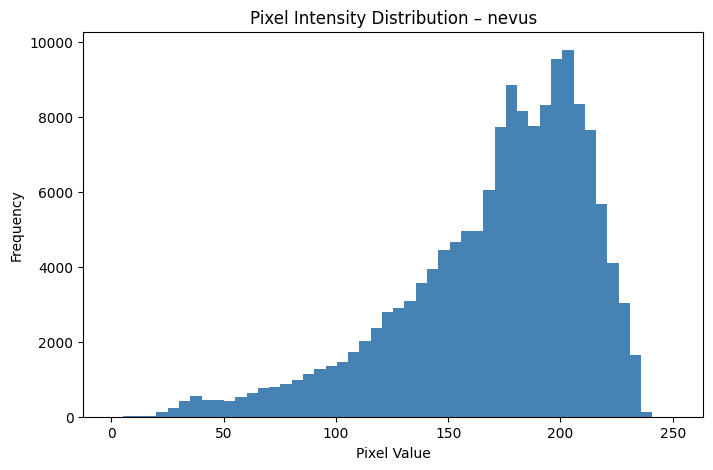

In [9]:
# ===========================
# 5️⃣ Pixel Intensity Histogram (Optional)
# ===========================
sample_class = 'melanoma_invasive'
folder = os.path.join(base_path, sample_class)
sample_img = Image.open(os.path.join(folder, os.listdir(folder)[0])).convert("RGB")
plt.figure(figsize=(8,5))
plt.hist(np.array(sample_img).ravel(), bins=50, color='steelblue')
plt.title(f"Pixel Intensity Distribution – {sample_class}")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


sample_class = 'melanoma_in_situ'
folder = os.path.join(base_path, sample_class)
sample_img = Image.open(os.path.join(folder, os.listdir(folder)[0])).convert("RGB")
plt.figure(figsize=(8,5))
plt.hist(np.array(sample_img).ravel(), bins=50, color='steelblue')
plt.title(f"Pixel Intensity Distribution – {sample_class}")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


sample_class = 'nevus'
folder = os.path.join(base_path, sample_class)
sample_img = Image.open(os.path.join(folder, os.listdir(folder)[0])).convert("RGB")
plt.figure(figsize=(8,5))
plt.hist(np.array(sample_img).ravel(), bins=50, color='steelblue')
plt.title(f"Pixel Intensity Distribution – {sample_class}")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


In [13]:
import os
import pandas as pd

base_path = r"/kaggle/input/melanoma-resized-dataset-version-03/melanoma_resized_dataset version 03"

label_folders = {
    'melanoma_in_situ': os.path.join(base_path, "melanoma_in_situ"),
    'melanoma_invasive': os.path.join(base_path, "melanoma_invasive"),
    'nevus': os.path.join(base_path, "nevus")
}

data = []
for label, folder in label_folders.items():
    for file in os.listdir(folder):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            data.append({
                'image_path': os.path.join(folder, file),
                'label': label
            })

df = pd.DataFrame(data)
print(df.head())
print(f"Total Images: {len(df)}")


                                          image_path             label
0  /kaggle/input/melanoma-resized-dataset-version...  melanoma_in_situ
1  /kaggle/input/melanoma-resized-dataset-version...  melanoma_in_situ
2  /kaggle/input/melanoma-resized-dataset-version...  melanoma_in_situ
3  /kaggle/input/melanoma-resized-dataset-version...  melanoma_in_situ
4  /kaggle/input/melanoma-resized-dataset-version...  melanoma_in_situ
Total Images: 10656


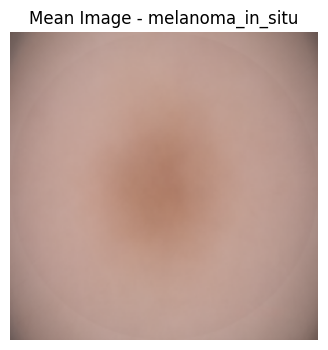

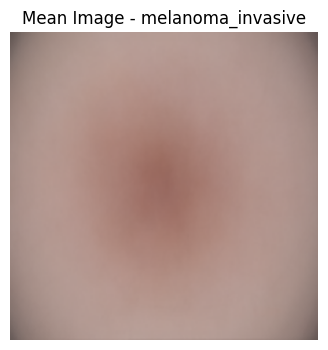

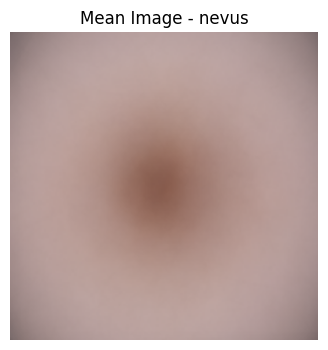

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def mean_image(image_paths, sample_size=200):
    imgs = []
    for p in np.random.choice(image_paths, sample_size, replace=False):
        img = np.array(Image.open(p).convert("RGB"), dtype=np.float32)
        imgs.append(img)
    mean_img = np.mean(imgs, axis=0).astype(np.uint8)
    return Image.fromarray(mean_img)

for cls in df['label'].unique():
    subset = df[df['label'] == cls]['image_path'].values
    avg_img = mean_image(subset)
    plt.figure(figsize=(4,4))
    plt.imshow(avg_img)
    plt.title(f"Mean Image - {cls}")
    plt.axis("off")
    plt.show()


In [18]:
sample_paths = df['image_path'].sample(300)
rgb_vals = []

for path in sample_paths:
    img = np.array(Image.open(path).convert("RGB")).reshape(-1,3)
    rgb_vals.append(np.mean(img, axis=0))

rgb_vals = np.array(rgb_vals)
pd.DataFrame(rgb_vals, columns=['R','G','B']).corr()



,R,G,B
R,1.000000,0.775466,0.619728
G,0.775466,1.000000,0.861550
B,0.619728,0.861550,1.000000


<Axes: >

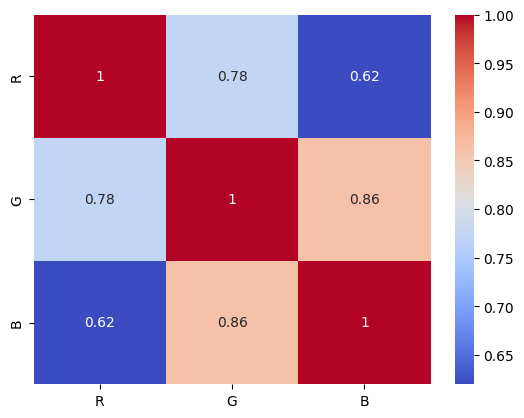

In [19]:

import seaborn as sns
sns.heatmap(pd.DataFrame(rgb_vals, columns=['R','G','B']).corr(), annot=True, cmap="coolwarm")


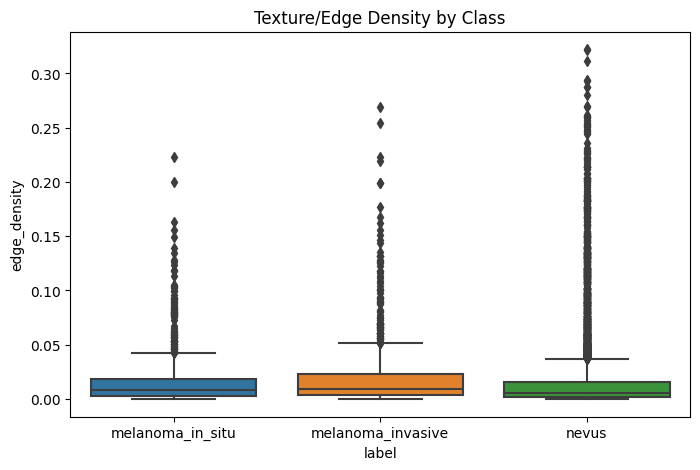

In [22]:
import cv2

def edge_density(img_path):
    img = cv2.imread(img_path, 0)
    edges = cv2.Canny(img, 100, 200)
    return np.sum(edges > 0) / edges.size

df['edge_density'] = df['image_path'].apply(edge_density)

plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='edge_density', data=df)
plt.title("Texture/Edge Density by Class")
plt.show()


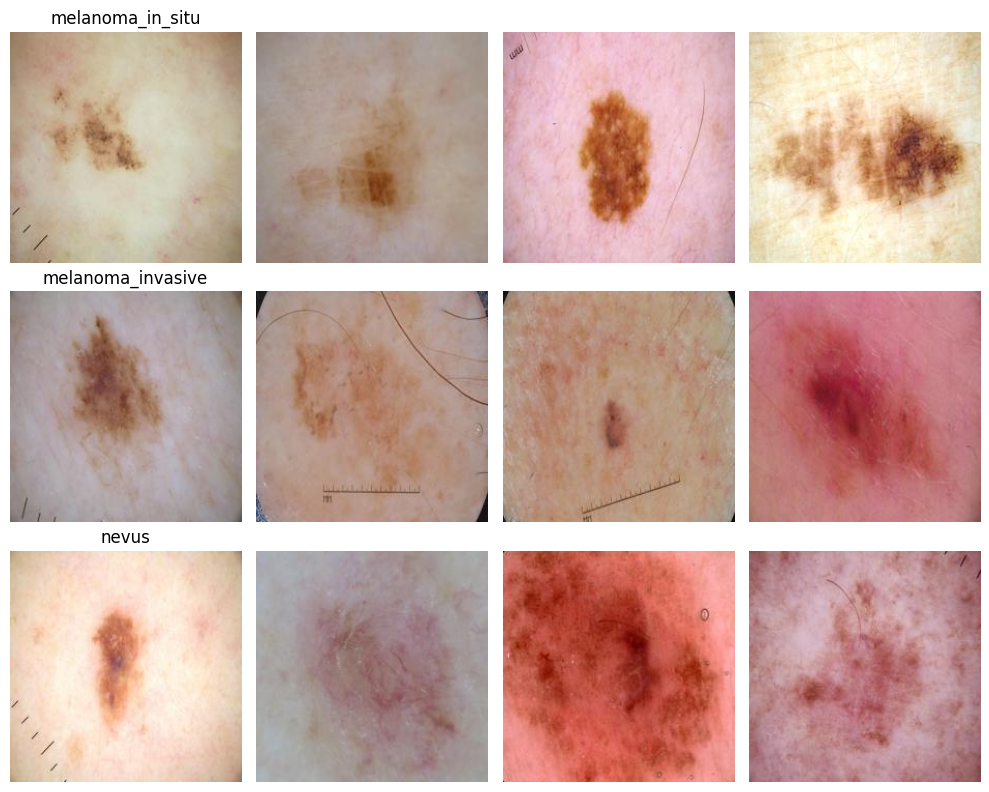

In [25]:
import random

fig, axes = plt.subplots(3, 4, figsize=(10,8))
for i, cls in enumerate(df['label'].unique()):
    subset = random.sample(list(df[df['label'] == cls]['image_path']), 4)
    for j, path in enumerate(subset):
        ax = axes[i, j]
        ax.imshow(Image.open(path))
        ax.axis('off')
        ax.set_title(cls if j==0 else "")
plt.tight_layout()
plt.show()
